This notebook serves for extensive hyperparameter optimization of the best models in traditional Machine Learning, i.e. SVM, Random Forest, XGB Classifier, and GFFNN. Moreover, we will look at the feature importances of these best models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# packages for models
from xgboost import XGBClassifier

# import own functions
from ipynb.fs.full.Functions import load_train_test_data, model_eval, run_gridsearchCV, load_model, feature_importance

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
df_most_important97 = pd.read_pickle('../results/df_prep_most_important97.pkl')

# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_most_important97, verbose=False, test_size=0.3)

# XGB

In [3]:
# define the model
xgb_model = XGBClassifier(random_state=0, verbosity=0, updater='grow_gpu_hist', tree_method='gpu_hist')

# define the grid for the hyperparameter search
xgb_grid = {'n_estimators': [5, 10, 100, 200, 250, 300],
            'max_depth' : [2, 5, 10, 20, 30, None], 
            'eta': [0.0001, 0.001, 0.01, 0.1], 
            'sampling_method': ['uniform', 'gradient_based'], 
            'gamma': [0, 0.01, 0.1]
           }

run_gridsearchCV(xgb_model, xgb_grid, X_train, y_train, name_spec='final')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=uniform; total time=   5.2s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=uniform; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=uniform; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=uniform; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=uniform; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=gradient_based; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=gradient_based; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=gradient_based; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=gradient_based; 


Evaluation: f1_score
100.00% for the train data
81.52% for the test data

Evaluation: accuracy_score
100.00% for the train data
81.37% for the test data

Evaluation: precision_score
100.00% for the train data
81.94% for the test data

Evaluation: recall_score
100.00% for the train data
81.43% for the test data

Evaluation: confusion_matrix of test predictions


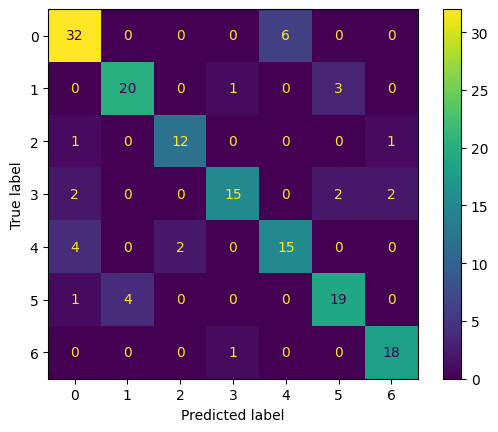


Hard cases for the model:

Label: happiness(4)
Hard cases of false positives: ['anger(0)']



In [3]:
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
model_eval(xgb_best_model, X_train, X_test, y_train, y_test, confusion=True)

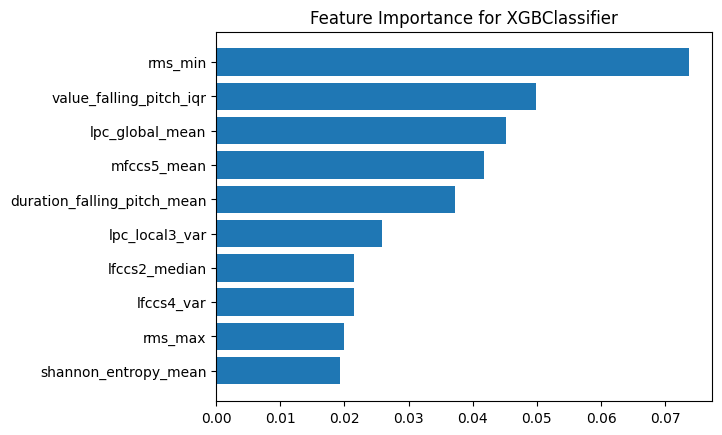

In [4]:
feature_imp_xgb = feature_importance(xgb_best_model, X_test, y_test, top=10)

In [15]:
# load data
df_most_important97 = pd.read_pickle('../results/df_prep_most_important97.pkl')

# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_most_important97, verbose=False, test_size=0.3)

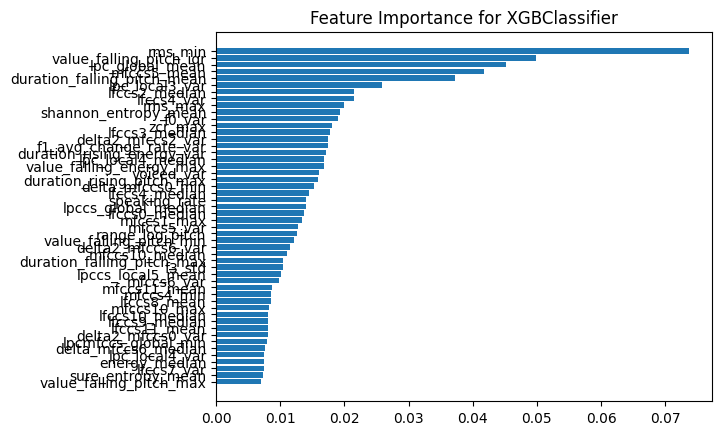

In [16]:
feature_imp_xgb = feature_importance(xgb_best_model, X_test, y_test, top=50)


Evaluation: f1_score
100.00% for the train data
79.35% for the test data

Evaluation: accuracy_score
100.00% for the train data
78.88% for the test data

Evaluation: precision_score
100.00% for the train data
80.81% for the test data

Evaluation: recall_score
100.00% for the train data
78.93% for the test data

Evaluation: confusion_matrix of test predictions


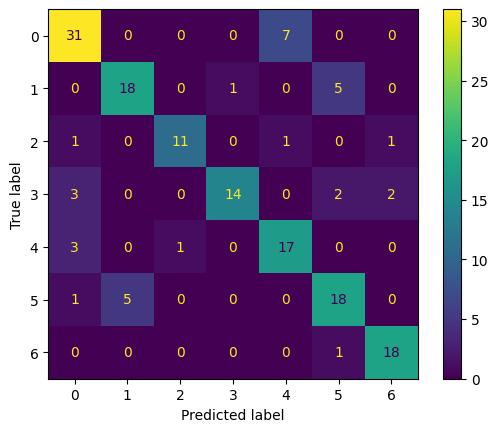


Hard cases for the model:

Label: boredom(1)
Hard cases of false negatives: ['neutral(5)']
Hard cases of false positives: ['neutral(5)']

Label: happiness(4)
Hard cases of false positives: ['anger(0)']

Label: neutral(5)
Hard cases of false negatives: ['boredom(1)']



In [17]:
# run best model with most important x features only
feature_imp_xgb = list(feature_imp_xgb)
feature_imp_xgb.append('label')

df_topx_xgb = df_most_important97[feature_imp_xgb].copy()

# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_topx_xgb, verbose=False, test_size=0.3)

# run and evaluate the model
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
xgb_topx = XGBClassifier().set_params(**xgb_best_model.get_params())
xgb_topx.fit(X_train, y_train)
model_eval(xgb_topx, X_train, X_test, y_train, y_test, confusion=True)